# SMS Spam Classification - Exploratory Data Analysis
We will begin exploring the training data in order to come up with insights and a plan for modeling.

In [1]:
# Importing libraries

from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

## 1. Data Preparation

In [26]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [27]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN
5572,ham,How are you doing? Hope you've settled in for ...,NaN,NaN,NaN
5573,spam,Give me your account number,NaN,NaN,NaN
5574,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5575,ham,Hahaha....you are so funny,NaN,NaN,NaN


In [23]:
#Dropping unnecessary columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
import numpy as np
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [25]:
df.head()

,v1,v2,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
df.tail()

,v1,v2,Count
5571,ham,Rofl. Its true to its name,26
5572,ham,How are you doing? Hope you've settled in for ...,92
5573,spam,Give me your account number,27
5574,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
5575,ham,Hahaha....you are so funny,26


In [9]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()

ham     4827
spam     749
Name: v1, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5576 non-null   object
 1   v2      5576 non-null   object
 2   Count   5576 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.8+ KB


In [11]:
corpus = []
ps = PorterStemmer()

In [12]:
# Original Messages

print (df['v2'][2])
print (df['v2'][3])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...


## 2. Exploratory Data Analysis

In [13]:
df.groupby('v1').describe()

Count                                                         
       count        mean        std   min    25%    50%    75%    max
v1                                                                   
ham   4827.0   70.985705  57.990057   2.0   33.0   52.0   92.0  910.0
spam   749.0  138.285714  29.302152  13.0  132.0  149.0  157.0  223.0

In [14]:
#Replacing column names
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [15]:
df.label.value_counts()

ham     4827
spam     749
Name: label, dtype: int64

In [16]:
df.sms.value_counts()

Sorry, I'll call later                                                                                                                                       30
I cant pick the phone right now. Pls send a message                                                                                                          12
Ok...                                                                                                                                                        10
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed ?1000 cash or ?5000 prize!           4
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"     4
                                                                                                                                                             ..
We got a divorce. Lol. She.s here       

In [17]:
df.groupby('sms').describe()

Count                    \
                                                   count   mean std    min   
sms                                                                          
 &lt;#&gt;  in mca. But not conform.                 1.0   36.0 NaN   36.0   
 &lt;#&gt;  mins but i had to stop somewhere fi...   1.0   51.0 NaN   51.0   
 &lt;DECIMAL&gt; m but its not a common car her...   1.0  132.0 NaN  132.0   
 and  picking them up from various points            1.0   41.0 NaN   41.0   
 came to look at the flat, seems ok, in his 50s...   1.0  103.0 NaN  103.0   
...                                                  ...    ...  ..    ...   
yay! finally lol. i missed our cinema trip last...   1.0   56.0 NaN   56.0   
yeah sure thing mate haunt got all my stuff sor...   1.0  142.0 NaN  142.0   
yeah, that's what I was thinking                     1.0   32.0 NaN   32.0   
yes baby! I need to stretch open your pussy!         1.0   44.0 NaN   44.0   
you are sweet as well, princess. Please tell me...   1.0   81.0 NaN   81.0   

                                                                                
                                                      25%    50%    75%    max  
sms                                                                             
 &lt;#&gt;  in mca. But not conform.                 36.0   36.0   36.0   36.0  
 &lt;#&gt;  mins but i had to stop somewhere fi...   51.0   51.0   51.0   51.0  
 &lt;DECIMAL&gt; m but its not a common car her...  132.0  132.0  132.0  132.0  
 and  picking them up from various points            41.0   41.0   41.0   41.0  
 came to look at the flat, seems ok, in his 50s...  103.0  103.0  103.0  103.0  
...                                                   ...    ...    ...    ...  
yay! finally lol. i missed our cinema trip last...   56.0   56.0   56.0   56.0  
yeah sure thing mate haunt got all my stuff sor...  142.0  142.0  142.0  142.0  
yeah, that's what I was thinking                     32.0   32.0   32.0   32.0  
yes baby! I need to stretch open your pussy!         44.0   44.0   44.0   44.0  
you are sweet as well, princess. Please tell me...   81.0   81.0   81.0   81.0  

[5171 rows x 8 columns]

In [18]:
df.groupby('label').describe()

Count                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4827.0   70.985705  57.990057   2.0   33.0   52.0   92.0  910.0
spam    749.0  138.285714  29.302152  13.0  132.0  149.0  157.0  223.0

In [29]:

df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4827   4517                             Sorry, I'll call later   30   
spam   749    654  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

### Inference
We can see the top msgs in ham and spam. Please call our customer service rep seems to be the most common spam message.

In [30]:
#Replacing column names
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [31]:
df.label.value_counts()

ham     4827
spam     749
Name: label, dtype: int64

In [32]:
df['sms length'] = df['sms'].apply(len)
df.head()

,label,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4,sms length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


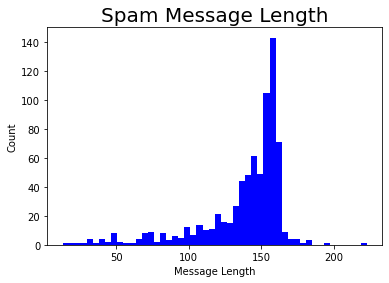

In [33]:
# Plotting length of sms text for spam sms
plt.hist(df[df['label']=='spam']['sms length'],color='blue',bins=50)
plt.title('Spam Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

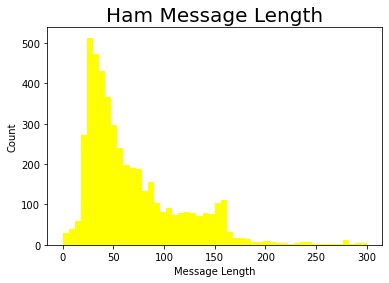

In [34]:
# Plotting length of sms text for spam sms
plt.hist(df[df['label']=='ham']['sms length'],color='yellow',bins=50,range=(0,300))
plt.title('Ham Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

### Inference
We can see that sms with longer text tend to be spam.

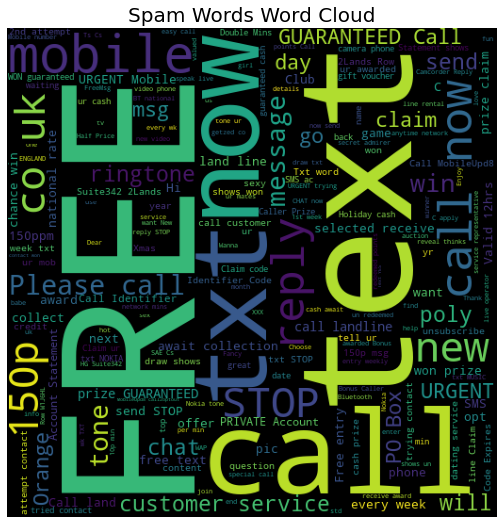

In [35]:
spam_words = ' '.join(list(df[df['label'] == 'spam']['sms']))
spam_wc = WordCloud(width=520,height=520).generate(spam_words)
plt.figure(figsize=(16,9))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam Words Word Cloud",fontsize=20)
plt.show()

### Inference
We can see that sms containing words FREE,Please Call, Now , Win,Text,Call tend to be very common spam words

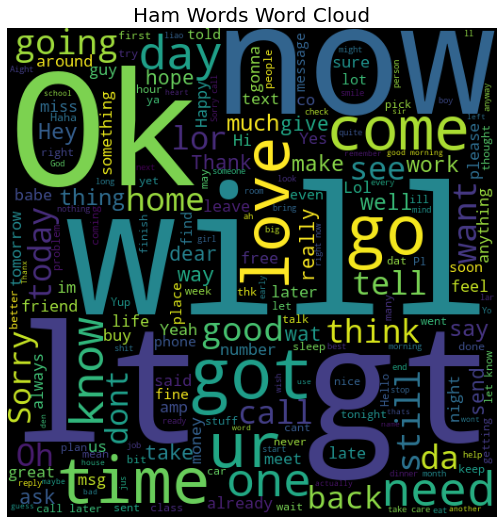

In [36]:
ham_words = ' '.join(list(df[df['label'] == 'ham']['sms']))
ham_wc = WordCloud(width=520,height=520).generate(ham_words)
plt.figure(figsize=(16,9))
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Ham Words Word Cloud",fontsize=20)
plt.show()

### Inference
We can see the most common ham sms contain words will, know, gt (got), OK, know, Love,now.